In [12]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.style as pltStyle
import matplotlib.pyplot as plt

# URL for JSON: https://unite-db.com/stats.json
# Convert to CSV: df.to_csv("uniteAggregate.csv", encoding='utf-8', index=False)

# Prepare figure sizes/style
plt.rcParams["figure.figsize"] = (15,10)
pltStyle.use('fivethirtyeight') 

# Load data using Python JSON module
with open('stats1_1_1_7.json','r') as f:
    data = json.loads(f.read())

# Normalizing data
df = pd.json_normalize(data, record_path=["level"], meta=["name"])

# Create level column
df.insert(loc=0, column="lvl",
    value=np.tile([i for i in range(1,16)], 23))

# Convert sp_attack column to be of numeric type
df["sp_attack"] = pd.to_numeric(df["sp_attack"])

# Add a BST column (sum of all stats)
# Note: feel free to remove HP since it can drown out other stats
df["bst"] = df["hp"] + df["attack"] + df["defense"] + df["sp_attack"] + df["sp_defense"]

print("Aggregate data")
print(df.head())

# Group data by level
grouped = df.groupby(["lvl"])

# Show all level 1 stats for each pokemon
print("Grouped data")
print(grouped.get_group(7))

Aggregate data
   lvl    hp  attack  defense  sp_attack  sp_defense   name   bst
0    1  3000     170       52         20          36  Absol  3278
1    2  3107     186       59         23          41  Absol  3416
2    3  3224     204       67         27          47  Absol  3569
3    4  3353     223       76         31          53  Absol  3736
4    5  3495     244       86         36          60  Absol  3921
Grouped data
     lvl    hp  attack  defense  sp_attack  sp_defense        name   bst
6      7  3823     293      109         47          76       Absol  4348
21     7  4491     177      196        119         137   Blastoise  5120
36     7  5255     201       87        204          66     Blissey  5813
51     7  4066     219      124         38          95   Charizard  4542
66     7  3702     221      108         49          65   Cinderace  4145
81     7  4118     175      126        240          84   Cramorant  4743
96     7  5242     226      239         47         164     Crustl

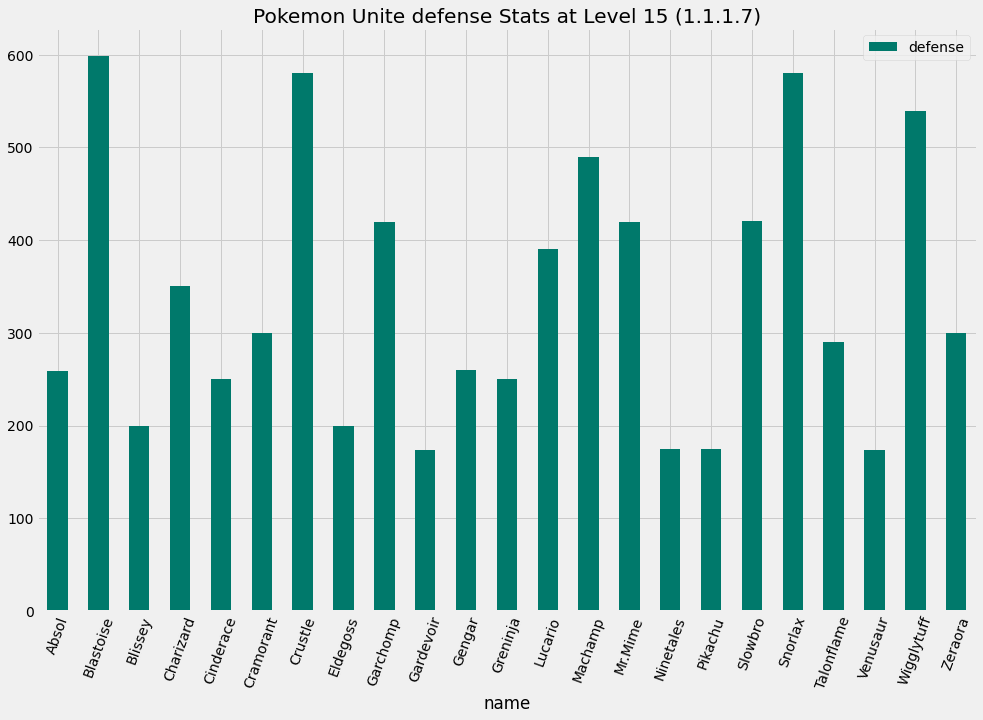

In [15]:
# Set up level/stat
level = 15
stat = "defense"
patch = "1.1.1.7"

# Graph data for specfic level/stat
ax = grouped.get_group(level).plot.bar(x="name", y=stat, 
  rot=0, color=["#00796B"])

ax.title.set_text("Pokemon Unite {} Stats at Level {} ({})".format(stat, level, patch))
ax.tick_params(axis="x", labelrotation=70)
ax.tick_params(axis="y", labelrotation=0)

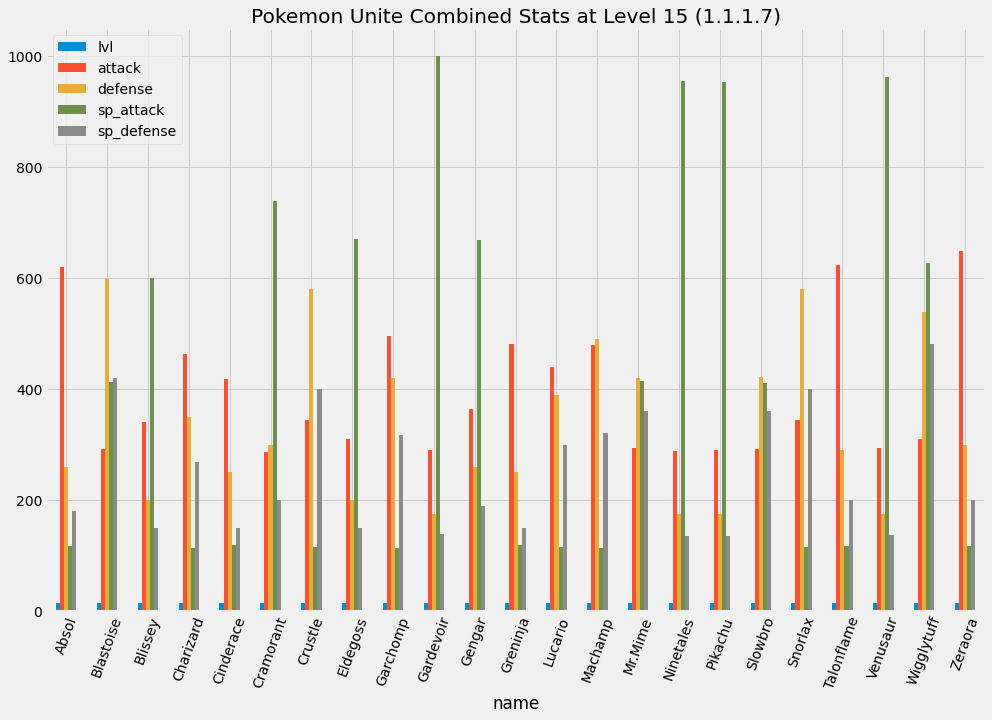

In [13]:
# Make grouped graph for specfic level/stat

# remove hp/bst since they're outliers (can compare invidually above)
df.pop("hp")
df.pop("bst")

ax = grouped.get_group(level).plot.bar(x="name", stacked=False)

ax.title.set_text("Pokemon Unite Combined Stats at Level {} ({})".format(level, patch))
ax.tick_params(axis="x", labelrotation=70)
ax.tick_params(axis="y", labelrotation=0)